In [1]:
import utils as u 

2024-05-03 12:48:25.655313: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_paths = [
    "data/data1.json", # Hand pose labels
    "data/data2.json", # Hand poses to be distinguished from the triggering hand poses.
    "data/data3.json", # Hand poses to be distinguished from the triggering hand poses.
    "data/data4.json", # Hand pose detection mistakes (noses) to be distinguished from the triggering hand poses.
    "data/data5.json", # Hand pose detection pondering to be distinguished from the heart.
    "data/data6.json", # Hand pose detection pondering to be distinguished from the heart.
    "data/data7.json", # Hand pose detection pondering to be distinguished from the heart.
    "data/data8.json", 
    "data/data9.json", 
    ]

x_train, y_train, x_test, y_test = u.load_data(file_paths, random_seed=2) 

[1 5 4 ... 4 0 5]


In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(8265, 63) (8265,) (2067, 63) (2067,)


In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = u.preprocess_data(x_train, 
                                                                 y_train, 
                                                                 x_test, 
                                                                 y_test)

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7439, 63) (7439,) (2067, 63) (2067,)


In [6]:
print(len(x_train.shape))
print(x_train.max())
print(x_train.min())

print(len(x_test.shape))
print(x_test.max())
print(x_test.min())

2
0.9988063
-0.21653211
2
0.9958083
-0.16142292


In [7]:
model = u.build_model()


In [8]:
history = u.train_model(model, x_train, y_train, x_val, y_val, 
                      epochs=30, batch_size=64)

Epoch 1/30
117/117 [==============================] - 1s 3ms/step - loss: 1.6605 - accuracy: 0.3925 - val_loss: 1.5084 - val_accuracy: 0.5763
Epoch 2/30
117/117 [==============================] - 0s 1ms/step - loss: 1.3303 - accuracy: 0.6161 - val_loss: 1.1886 - val_accuracy: 0.6731
Epoch 3/30
117/117 [==============================] - 0s 1ms/step - loss: 1.0271 - accuracy: 0.6853 - val_loss: 0.9433 - val_accuracy: 0.7119
Epoch 4/30
117/117 [==============================] - 0s 1ms/step - loss: 0.8166 - accuracy: 0.7387 - val_loss: 0.7775 - val_accuracy: 0.7421
Epoch 5/30
117/117 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.7802 - val_loss: 0.6603 - val_accuracy: 0.7893
Epoch 6/30
117/117 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.8242 - val_loss: 0.5719 - val_accuracy: 0.8366
Epoch 7/30
117/117 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.8676 - val_loss: 0.5070 - val_accuracy: 0.8753
Epoch 

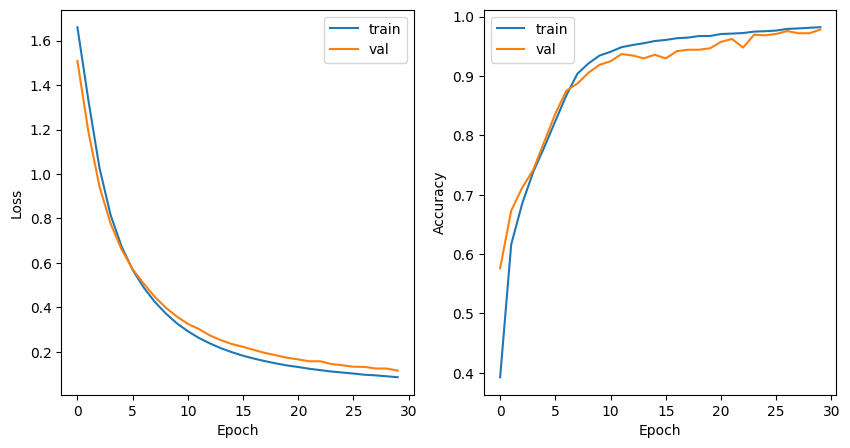

In [9]:
u.plot_loss(history)

In [10]:
test_acc, y_pred = u.test_model(model, x_test, y_test)
print(y_pred)

65/65 [==============================] - 0s 840us/step
[[1.3733973e-02 5.9764065e-02 5.9416094e-03 5.2919169e-04 9.2000133e-01
  2.9859040e-05]
 [5.1887118e-04 1.5943472e-11 7.8833253e-08 9.9947685e-01 4.6540347e-07
  3.6116146e-06]
 [1.5202186e-04 7.7233417e-04 9.9905497e-01 7.4106348e-09 9.7157408e-07
  1.9801681e-05]
 ...
 [1.0722489e-03 1.4656940e-02 2.1948863e-03 1.1957324e-06 9.7938287e-01
  2.6919572e-03]
 [8.8558358e-01 7.4905652e-04 2.0525608e-02 7.2590739e-02 4.3304609e-03
  1.6220627e-02]
 [4.6532579e-02 5.4912207e-06 5.5094361e-03 3.3713452e-04 7.3815499e-05
  9.4754153e-01]]
65/65 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9768
[4 3 2 ... 4 0 5]


In [11]:
model.save('./Handpose-Recognition.keras')

In [12]:
print(test_acc)

0.9767779111862183


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2048      
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2246 (8.77 KB)
Trainable params: 2246 (8.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_graph_model \
    --saved_model_tags=serve \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-TFJS/Hand-Pose-V1-ML/Handpose-Recognition.keras  \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-TFJS/Hand-Pose-V1-ML/tfjsmodel
